In [3]:
import rawpy
import imageio
import cv2    
import numpy as np
import matplotlib.pyplot as plt
import ipdb
import math
from PIL import Image

In [5]:
def designed_bilateral_filter(image,d,sigma_c,sigma_d): 
    b,g,r = cv2.split(image) 
    bilatb=np.zeros(b.shape)
    bilatg=np.zeros(g.shape)
    bilatr=np.zeros(r.shape)

    m= int((d-1)/2) 
    for i in range(m,b.shape[0]-m): 
        for j in range(m,b.shape[1]-m):
            Wp1=0 
            Wp2=0
            Wp3=0
            for k in range(i-m,m+i+1):
                for l in range(j-m,m+j+1):
                    Wp1+=weight(b,i,j,k,l,sigma_c,sigma_d) 
                    Wp2+=weight(g,i,j,k,l,sigma_c,sigma_d)
                    Wp3+=weight(r,i,j,k,l,sigma_c,sigma_d)
                    bilatb[i,j]+=b[k,l]*weight(b,i,j,k,l,sigma_c,sigma_d) 
                    bilatg[i,j]+=g[k,l]*weight(g,i,j,k,l,sigma_c,sigma_d)
                    bilatr[i,j]+=r[k,l]*weight(r,i,j,k,l,sigma_c,sigma_d)
                    if (k==m+i) and (l==m+j):
                        bilatb[i,j]=int(round(bilatb[i,j]/Wp1))
                        bilatg[i,j]=int(round(bilatg[i,j]/Wp2))
                        bilatr[i,j]=int(round(bilatr[i,j]/Wp3))
    for i in range(0,m):
        for j in range(0,b.shape[1]):
            bilatb[i,j]=b[i,j]
            bilatg[i,j]=g[i,j]
            bilatr[i,j]=r[i,j]
    for i in range(b.shape[0]-m-1,b.shape[0]):
        for j in range(0,b.shape[1]):
            bilatb[i,j]=b[i,j]
            bilatg[i,j]=g[i,j]
            bilatr[i,j]=r[i,j]
    for i in range(0,b.shape[0]):
        for j in range(0,m):
            bilatb[i,j]=b[i,j]
            bilatg[i,j]=g[i,j]
            bilatr[i,j]=r[i,j]
    for i in range(0,b.shape[0]):
        for j in range(b.shape[1]-m-1,b.shape[1]):
            bilatb[i,j]=b[i,j]
            bilatg[i,j]=g[i,j]
            bilatr[i,j]=r[i,j]

    bilat1 = np.zeros(image.shape) 
    bilat1[..., 0] = bilatb # Red Matrix
    bilat1[..., 1] = bilatg # Green Matrix
    bilat1[..., 2] = bilatr # Red Matrix
    return bilat1

def distance(x, y, p, q):
    return np.sqrt((x-p)**2 + (y-q)**2)

def gaussian(x, sigma): 
    return (1.0 /np.sqrt(2 * math.pi * (sigma ** 2)))* math.exp(- (x ** 2) / (2 * sigma ** 2))

def weight(image,i,j,k,l,sigma_c,sigma_d):
    fg = gaussian(image[k][l] - image[i][j], sigma_c) 
    gs = gaussian(distance(i, j, k, l), sigma_d)
    w = fg * gs
    return w


C:\Users\fateme\AppData\Local\Temp/ipykernel_7320/3751526533.py:59: RuntimeWarning: overflow encountered in ubyte_scalars
  fg = gaussian(image[k][l] - image[i][j], sigma_c)


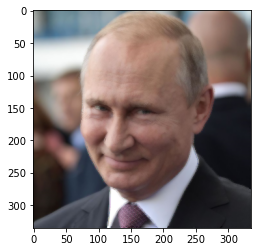

In [8]:
filename='putin.png'
bgr = cv2.imread(filename) 
bgr1=cv2.resize(bgr,None,fx=0.5, fy=0.5, interpolation= cv2.INTER_CUBIC) 

bilat_put = designed_bilateral_filter(bgr1,5,100,300) 

plt.imshow(cv2.cvtColor(bilat_put.astype('uint8'), cv2.COLOR_BGR2RGB))
plt.show()

C:\Users\fateme\AppData\Local\Temp/ipykernel_7320/3751526533.py:59: RuntimeWarning: overflow encountered in ubyte_scalars
  fg = gaussian(image[k][l] - image[i][j], sigma_c)


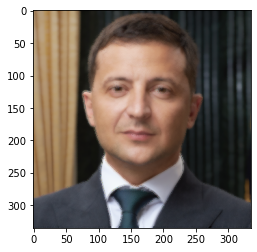

In [27]:
filename='zelensky.png'
bgr = cv2.imread(filename)
bgr1=cv2.resize(bgr,None,fx=0.5, fy=0.5, interpolation= cv2.INTER_CUBIC)

bilat_zel = designed_bilateral_filter(bgr1,5,100,300)
cv2.imwrite("filter_zelensky.png", bilat_zel.astype('uint8')) 

plt.imshow(cv2.cvtColor(bilat_zel.astype('uint8'), cv2.COLOR_BGR2RGB))
plt.show()

In [18]:
putin_filtered = cv2.cvtColor(bilat_put.astype('uint8'), cv2.COLOR_RGB2GRAY)

In [28]:
zelensky_filtered = cv2.cvtColor(bilat_zel.astype('uint8'), cv2.COLOR_RGB2GRAY)

In [39]:
def color_change(image,plot=False):
    color_image = np.zeros((image.shape[0], image.shape[0], 3)).astype(np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i, j] < 70:
                color_image[i, j] = [0, 48, 80]
            elif image[i, j] < 120:
                color_image[i, j] = [218, 20, 21]
            elif image[i, j] < 150:
                color_image[i, j] = [112, 150, 160]
            elif image[i, j] <= 255:
                color_image[i, j] = [250, 227, 173]
    if plot:            
        plt.imshow(color_image)
    return color_image

array([[[250, 227, 173],
        [250, 227, 173],
        [250, 227, 173],
        ...,
        [250, 227, 173],
        [250, 227, 173],
        [250, 227, 173]],

       [[250, 227, 173],
        [250, 227, 173],
        [250, 227, 173],
        ...,
        [250, 227, 173],
        [250, 227, 173],
        [250, 227, 173]],

       [[250, 227, 173],
        [250, 227, 173],
        [250, 227, 173],
        ...,
        [250, 227, 173],
        [250, 227, 173],
        [250, 227, 173]],

       ...,

       [[218,  20,  21],
        [218,  20,  21],
        [218,  20,  21],
        ...,
        [  0,  48,  80],
        [  0,  48,  80],
        [  0,  48,  80]],

       [[218,  20,  21],
        [218,  20,  21],
        [218,  20,  21],
        ...,
        [  0,  48,  80],
        [  0,  48,  80],
        [  0,  48,  80]],

       [[218,  20,  21],
        [218,  20,  21],
        [218,  20,  21],
        ...,
        [  0,  48,  80],
        [  0,  48,  80],
        [  0,  48,  80]]

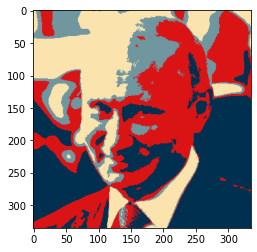

In [40]:
color_change(putin_filtered,plot=True)

array([[[112, 150, 160],
        [112, 150, 160],
        [218,  20,  21],
        ...,
        [  0,  48,  80],
        [  0,  48,  80],
        [  0,  48,  80]],

       [[112, 150, 160],
        [112, 150, 160],
        [218,  20,  21],
        ...,
        [  0,  48,  80],
        [  0,  48,  80],
        [  0,  48,  80]],

       [[112, 150, 160],
        [112, 150, 160],
        [112, 150, 160],
        ...,
        [  0,  48,  80],
        [  0,  48,  80],
        [  0,  48,  80]],

       ...,

       [[  0,  48,  80],
        [  0,  48,  80],
        [  0,  48,  80],
        ...,
        [  0,  48,  80],
        [  0,  48,  80],
        [  0,  48,  80]],

       [[  0,  48,  80],
        [  0,  48,  80],
        [  0,  48,  80],
        ...,
        [  0,  48,  80],
        [  0,  48,  80],
        [  0,  48,  80]],

       [[  0,  48,  80],
        [  0,  48,  80],
        [  0,  48,  80],
        ...,
        [  0,  48,  80],
        [  0,  48,  80],
        [  0,  48,  80]]

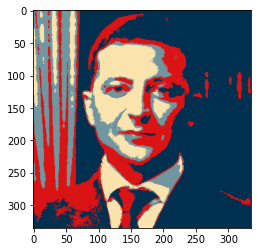

In [42]:
color_change(zelensky_filtered,plot=True)

In [43]:
def masked(image, mask):
    sub = cv2.bitwise_and(image, mask)
    return sub

In [44]:
def seperate_back_for(image, mask):
    sub = np.zeros(image.shape).astype(np.uint8)
    sub[:, :image.shape[1] // 2] = [112, 150, 160]
    sub[:, image.shape[1] // 2:] = [218, 20, 21]
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if all(mask[i, j] != [0, 0, 0]):
                sub[i, j] = image[i, j]
                
    plt.imshow(sub)
    return sub

In [64]:
img1 =cv2.imread('putin.png')
f='putin_mask.png'
img3 = cv2.imread(f)
img_masked_putin = masked(img1,img3)

In [66]:
filterd = designed_bilateral_filter(img_masked_putin, 5,20,30)

C:\Users\fateme\AppData\Local\Temp/ipykernel_7320/3751526533.py:59: RuntimeWarning: overflow encountered in ubyte_scalars
  fg = gaussian(image[k][l] - image[i][j], sigma_c)


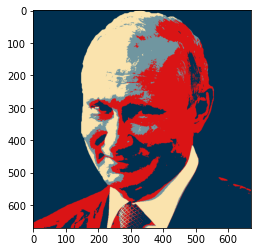

In [71]:
filtered = cv2.cvtColor(filterd.astype('uint8'), cv2.COLOR_RGB2GRAY)
finall = color_change(filtered,plot=True)

array([[[112, 150, 160],
        [112, 150, 160],
        [112, 150, 160],
        ...,
        [218,  20,  21],
        [218,  20,  21],
        [218,  20,  21]],

       [[112, 150, 160],
        [112, 150, 160],
        [112, 150, 160],
        ...,
        [218,  20,  21],
        [218,  20,  21],
        [218,  20,  21]],

       [[112, 150, 160],
        [112, 150, 160],
        [112, 150, 160],
        ...,
        [218,  20,  21],
        [218,  20,  21],
        [218,  20,  21]],

       ...,

       [[218,  20,  21],
        [218,  20,  21],
        [218,  20,  21],
        ...,
        [  0,  48,  80],
        [  0,  48,  80],
        [  0,  48,  80]],

       [[218,  20,  21],
        [218,  20,  21],
        [218,  20,  21],
        ...,
        [  0,  48,  80],
        [  0,  48,  80],
        [  0,  48,  80]],

       [[218,  20,  21],
        [218,  20,  21],
        [218,  20,  21],
        ...,
        [  0,  48,  80],
        [  0,  48,  80],
        [  0,  48,  80]]

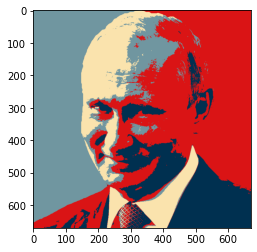

In [72]:
seperate_back_for(finall,img3)

In [75]:
img1 =cv2.imread('zelensky.png')
f='zelensky_mask.png'
img3 = cv2.imread(f)
img_masked_zelensky = masked(img1,img3)

In [76]:
filterd = designed_bilateral_filter(img_masked_putin, 5,20,30)

C:\Users\fateme\AppData\Local\Temp/ipykernel_7320/3751526533.py:59: RuntimeWarning: overflow encountered in ubyte_scalars
  fg = gaussian(image[k][l] - image[i][j], sigma_c)


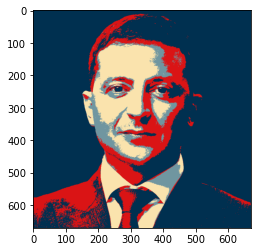

In [77]:
filtered = cv2.cvtColor(filterd.astype('uint8'), cv2.COLOR_RGB2GRAY)
finall = color_change(filtered,plot=True)

array([[[112, 150, 160],
        [112, 150, 160],
        [112, 150, 160],
        ...,
        [218,  20,  21],
        [218,  20,  21],
        [218,  20,  21]],

       [[112, 150, 160],
        [112, 150, 160],
        [112, 150, 160],
        ...,
        [218,  20,  21],
        [218,  20,  21],
        [218,  20,  21]],

       [[112, 150, 160],
        [112, 150, 160],
        [112, 150, 160],
        ...,
        [218,  20,  21],
        [218,  20,  21],
        [218,  20,  21]],

       ...,

       [[  0,  48,  80],
        [  0,  48,  80],
        [  0,  48,  80],
        ...,
        [  0,  48,  80],
        [  0,  48,  80],
        [  0,  48,  80]],

       [[  0,  48,  80],
        [  0,  48,  80],
        [  0,  48,  80],
        ...,
        [  0,  48,  80],
        [  0,  48,  80],
        [  0,  48,  80]],

       [[  0,  48,  80],
        [  0,  48,  80],
        [  0,  48,  80],
        ...,
        [  0,  48,  80],
        [  0,  48,  80],
        [  0,  48,  80]]

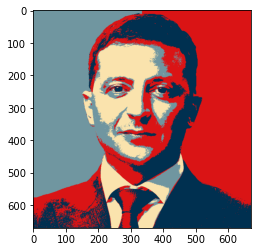

In [78]:
seperate_back_for(finall,img3)